# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

Зчитую дані з файлу у датафрейм


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "clean_data2.csv"
df = pd.read_csv(path)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Area</li>
    <li>Population</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lr_area = LinearRegression()
lr_area

LinearRegression()

Знаходжу коефіцієнти моделі


In [4]:
X = df[['Area']]
Y = df['CO2 emission']

lr_area.fit(X, Y)

print('a: ', lr_area.intercept_)
print('b: ', lr_area.coef_)


a:  4533.3581951147935
b:  [0.259485]


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = a + b  X
$$

Підставляючи фактичні значення, маємо:

In [5]:
# CO2 emission = 4533.3581951147935 + 0.259485*X

Створюю об’єкт лінійної регресії та навчаю другу модель


In [6]:
lr_pop = LinearRegression()
lr_pop


LinearRegression()

Знаходжу коефіцієнти моделі


In [7]:
X = df[['Population']]
Y = df['CO2 emission']

lr_pop.fit(X, Y)

print('a: ', lr_pop.intercept_)
print('b: ', lr_pop.coef_)

a:  -782.8642515406245
b:  [0.00483347]


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = a + b  X
$$

Підставляючи фактичні значення, маємо:


In [8]:
# CO2 emission = -782.8642515406245 + 0.00483347*X

<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [9]:
lm2 = LinearRegression()
lm2.fit(df[['Area', 'Population']], df['CO2 emission'])

LinearRegression()

Знаходжу коефіцієнти моделі


In [10]:
print("a: ", lm2.intercept_)
print("b[]: ", lm2.coef_)

a:  -51153.70055281371
b[]:  [0.12369062 0.00407087]


Підставляючи фактичні значення, маємо:

In [11]:
# CO2 emission = -51153.70055281371 + 0.12369062*Area + 0.00407087*Population

<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

Знаходжу коефіцієнти моделі


In [12]:
x = df['Area']
y = df['CO2 emission']

f_area = np.polyfit(x, y, 2)
p_area = np.poly1d(f_area )
print(p_area )

            2
-1.484e-08 x + 0.436 x - 4.963e+04


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

Знаходжу коефіцієнти моделі


In [13]:
x = df['Population']
y = df['CO2 emission']

f_pop = np.polyfit(x, y, 2)
p_pop = np.poly1d(f_pop)
print(p_pop)


            2
-3.004e-13 x + 0.00521 x - 7948


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

Знаходжу коефіцієнти моделі


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


#Oб'єкт PolynomialFeatures для генерації поліноміальних ознак
poly = PolynomialFeatures(degree=2, include_bias=False)
Z_poly = poly.fit_transform(df[['Area', 'Population']])

#Ініціалізуємо та навчаємо модель лінійної регресії
lm_poly = LinearRegression()
lm_poly.fit(Z_poly, df['CO2 emission'])

a = lm_poly.intercept_
b1, b2, b3, b4, b5 = lm_poly.coef_

print(f'a = {a}')
print(f'b1 = {b1}')
print(f'b2 = {b2}')
print(f'b3 = {b3}')
print(f'b4 = {b4}')
print(f'b5 = {b5}')


a = 13674.980386565207
b1 = 0.02192043006843306
b2 = 0.00226971605503756
b3 = -4.106098331537386e-09
b4 = 1.0201133972336652e-09
b5 = -3.1105847002625815e-12


<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


(0.0, 11796933.677805936)

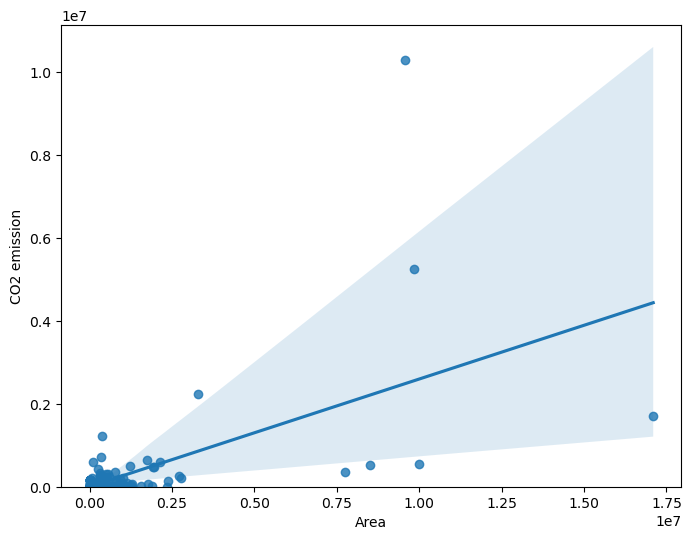

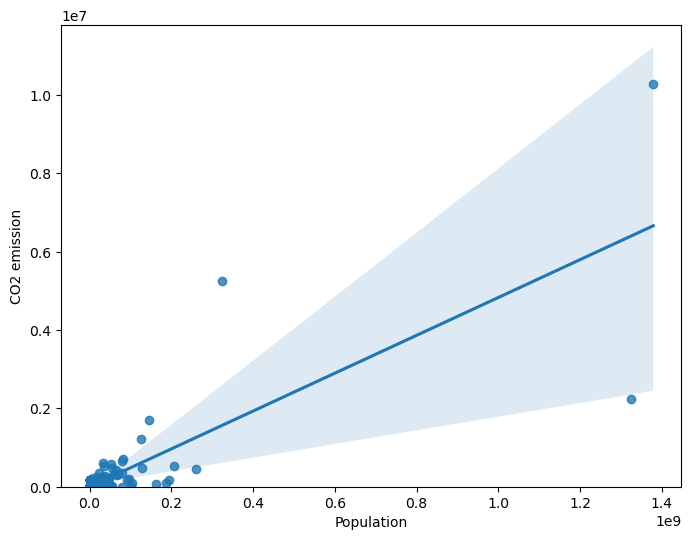

In [15]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x='Area', y='CO2 emission', data=df)
plt.ylim(0,)

plt.figure(figsize=(width, height))
sns.regplot(x='Population', y='CO2 emission', data=df)
plt.ylim(0,)


Для візуалізації дисперсії даних використаю діаграми залишків.


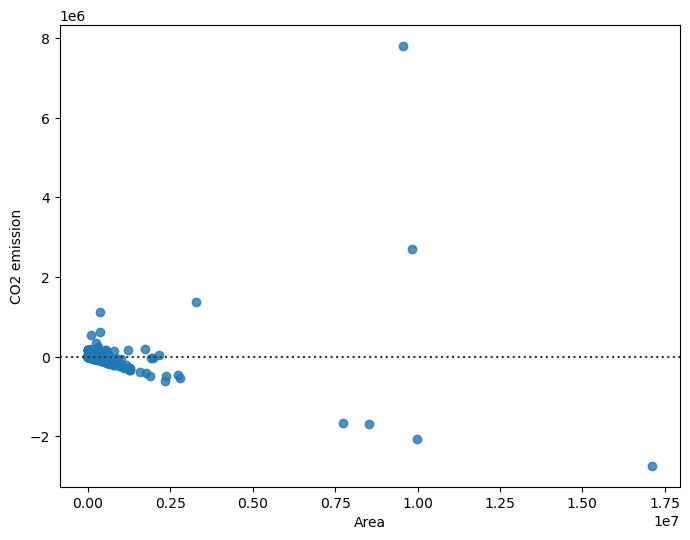

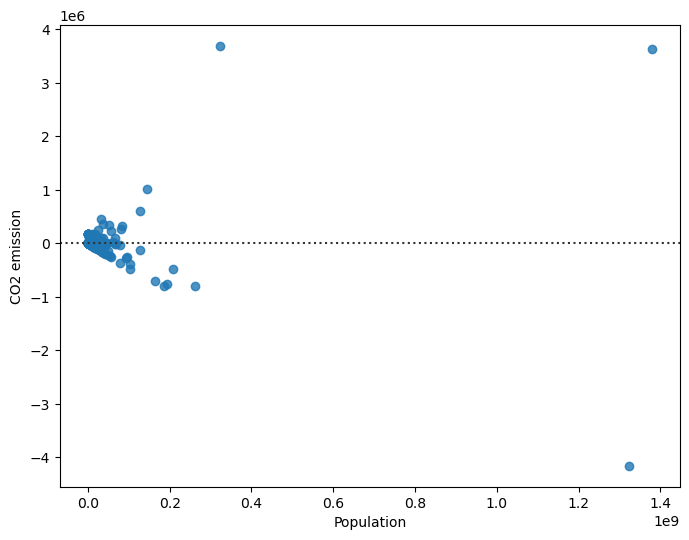

In [16]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['Area'], y=df['CO2 emission'])

plt.figure(figsize=(width, height))
sns.residplot(x=df['Population'], y=df['CO2 emission'])
plt.show()


Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


C:\Users\oksan\AppData\Local\Temp\ipykernel_10672\2499854700.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\AppData\Local\Temp\ipykernel_10672\2499854700.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

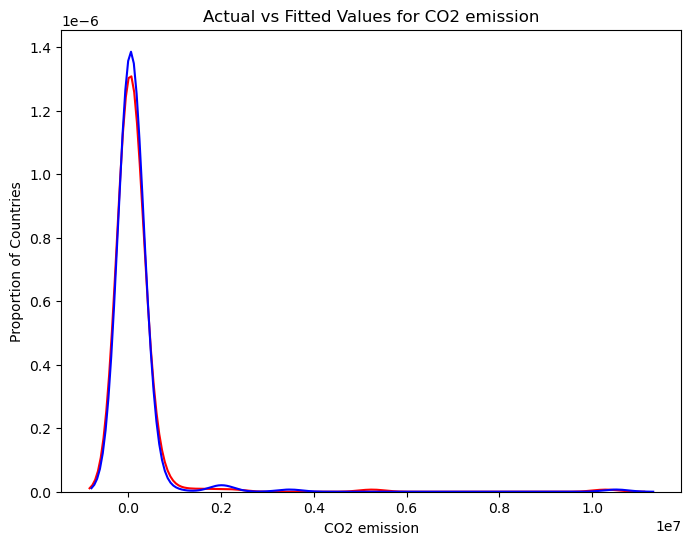

In [17]:
Y_hat = lm_poly.predict(Z_poly)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("CO2 emission")
plt.ylabel("Proportion of Countries")

plt.show()
plt.close()

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>


            2
-1.484e-08 x + 0.436 x - 4.963e+04


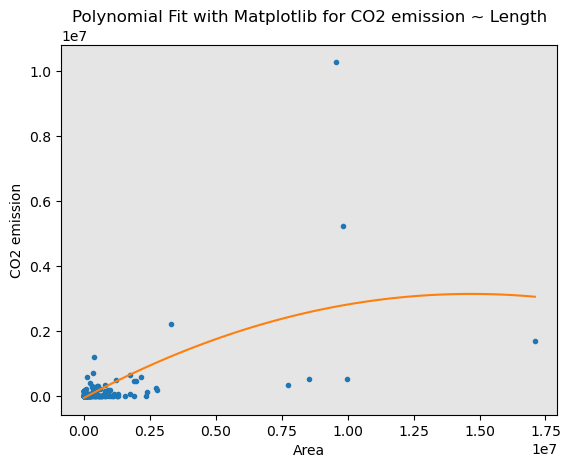

            2
-3.004e-13 x + 0.00521 x - 7948


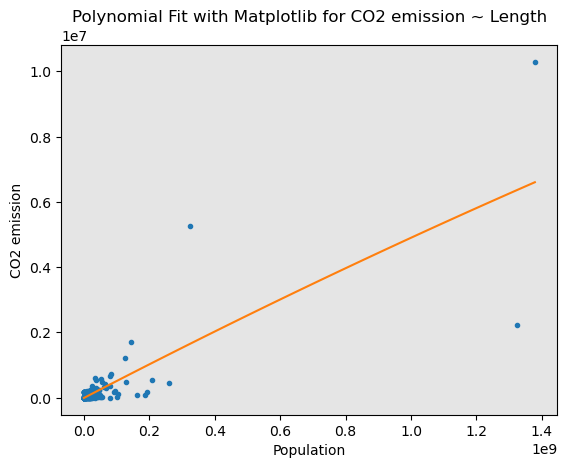

In [18]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(min(independent_variable), max(independent_variable), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title("Polynomial Fit with Matplotlib for CO2 emission ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("CO2 emission")

    plt.show()
    # plt.close()

f_area = np.polyfit(df['Area'], df['CO2 emission'], 2)
p_area = np.poly1d(f_area)
print(p_area)
PlotPolly(p_area, df['Area'], df['CO2 emission'], 'Area')

f_pop = np.polyfit(df['Population'], df['CO2 emission'], 2)
p_pop = np.poly1d(f_pop)
print(p_pop)
PlotPolly(p_pop, df['Population'],df['CO2 emission'], 'Population')



Візуалізую результати поліноміальних моделей з кількома предикторами


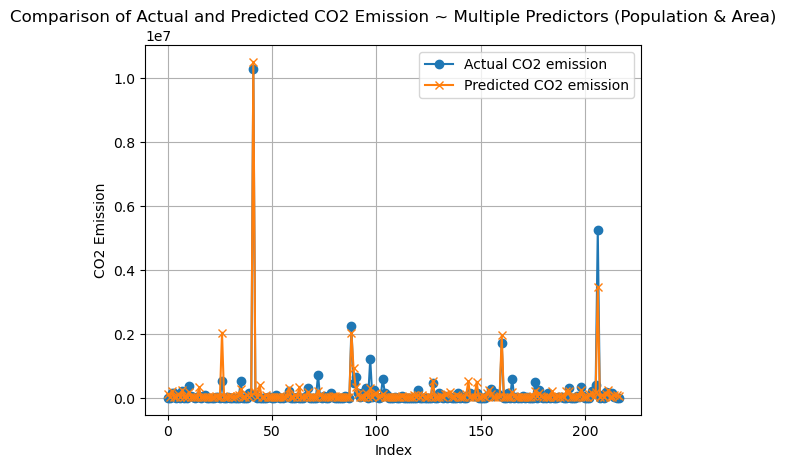

In [19]:
# Функція для візуалізації фактичних і передбачених значень
def plot_real_vs_predicted(y_real, y_predicted, Name):
    # Візуалізація фактичних і передбачених значень
    plt.plot(y_real, label='Actual CO2 emission', marker='o')
    plt.plot(y_predicted, label='Predicted CO2 emission', marker='x')
    plt.title(f"Comparison of Actual and Predicted CO2 Emission ~ {Name}")
    plt.xlabel("Index")
    plt.ylabel("CO2 Emission")
    plt.legend()
    plt.grid()
    plt.show()

# Дані
Z = df[['Population', 'Area']]
y = df['CO2 emission']

# Поліноміальні ознаки 2-го степеня
poly = PolynomialFeatures(degree=2)
Z_poly = poly.fit_transform(Z)

# Лінійна регресія з поліноміальними ознаками
lm = LinearRegression()
lm.fit(Z_poly, y)

# Передбачення
Y_hat = lm.predict(Z_poly)

# Виклик функції plot_real_vs_predicted для порівняння
plot_real_vs_predicted(y, Y_hat, "Multiple Predictors (Population & Area)")

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


Модель 1:
$$
Yhat1 = a + b  X
$$


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = df[['Population']]
Y = df['CO2 emission']

# Навчання моделі на основі однієї ознаки
lm_single = LinearRegression()
lm_single.fit(X, Y)

# Передбачення для нової моделі
y_pred_single = lm_single.predict(X)

# Обчислення MSE для нової моделі
mse_single = mean_squared_error(Y, y_pred_single)

# Обчислення R^2 для нової моделі
r2_score_single = lm_single.score(X, Y)

print("MSE для моделі на основі однієї ознаки:", mse_single)
print("R^2 для моделі на основі однієї ознаки:", r2_score_single)
print('Передбачені значення:: ', y_pred_single[0:4])

MSE для моделі на основі однієї ознаки: 232801816739.9179
R^2 для моделі на основі однієї ознаки: 0.6435755233131817
Передбачені значення::  [166725.94304326  13118.67670299 195485.17184303   -514.12828729]


Модель 2:
$$
Yhat2 = a + b  X
$$

In [21]:
X = df[['Area']]
Y = df['CO2 emission']

# Навчання моделі на основі однієї ознаки
lm_single = LinearRegression()
lm_single.fit(X, Y)

# Передбачення для нової моделі
y_pred_model2 = lm_single.predict(X)

# Обчислення MSE для нової моделі
mse_single = mean_squared_error(Y, y_pred_single)

# Обчислення R^2 для нової моделі
r2_score_single = lm_single.score(X, Y)

print("MSE для моделі на основі однієї ознаки:", mse_single)
print("R^2 для моделі на основі однієї ознаки:", r2_score_single)
print('Передбачені значення:: ', y_pred_model2[0:4])

MSE для моделі на основі однієї ознаки: 232801816739.9179
R^2 для моделі на основі однієї ознаки: 0.34282421100737426
Передбачені значення::  [173940.73285816  11993.5518378  622559.15320471   4585.25519437]


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [22]:
X = df[['Population', 'Area']]
Y = df['CO2 emission']

lm_poly = LinearRegression()
lm_poly.fit(X, Y)

y_pred_model3 = lm_poly.predict(X)  

mse_model3 = mean_squared_error(Y, y_pred_model3)

r2_score_model3 = lm_poly.score(X, Y)

print("MSE для моделі 3:", mse_model3)
print("R^2 для моделі 3:", r2_score_model3)
print('Передбачені значення: ', y_pred_model3[0:4])

MSE для моделі 3: 192386633940.86154
R^2 для моделі 3: 0.705452018011884
Передбачені значення:  [170679.08546    -35889.3680186  408747.06980287 -50902.62624497]


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X = df['Population']
Y = df['CO2 emission']
fp = np.polyfit(X, Y, 2)
p = np.poly1d(fp)
# y_pred_model4 = lm_poly.predict(X)  
r_squared_model4 = r2_score(y, p(X))
mse_model4 = mean_squared_error(Y, p(X))
print("MSE для моделі 4:", mse_model4)
print("R^2 для моделі 4:", r_squared_model4)
# print('Передбачені значення: ', y_pred_model4[0:4])

MSE для моделі 4: 232596015620.61905
R^2 для моделі 4: 0.643890609154327


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [24]:

X = df['Area']
Y = df['CO2 emission']
fp = np.polyfit(X, Y, 2)
p = np.poly1d(fp)
r_squared_model5 = r2_score(y, p(X))
mse_model5 = mean_squared_error(Y, p(X))
print("MSE для моделі 5:", mse_model5)
print("R^2 для моделі 5:", r_squared_model5)


MSE для моделі 5: 411586514354.21747
R^2 для моделі 5: 0.3698523918567883


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [25]:
Z = df[['Population', 'Area']]
Y = df['CO2 emission']

poly = PolynomialFeatures(degree=2)
Z_poly = poly.fit_transform(Z)

lm = LinearRegression()
lm.fit(Z_poly, Y)  

y_pred_model6 = lm.predict(Z_poly)

r_squared_model6 = lm.score(Z_poly, Y)
mse_model6 = mean_squared_error(Y, y_pred_model6)

print("MSE для моделі 6:", mse_model6)
print("R^2 для моделі 6:", r_squared_model6)
print('Передбачені значення: ', y_pred_model6[0:4])

MSE для моделі 6: 41866620804.35558
R^2 для моделі 6: 0.9359013231949611
Передбачені значення:  [124239.85818075  20888.35243503 228284.75225186  13805.56019761]


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель 6 є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>


<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей.
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


            2
-3.004e-13 x + 0.00521 x - 7948


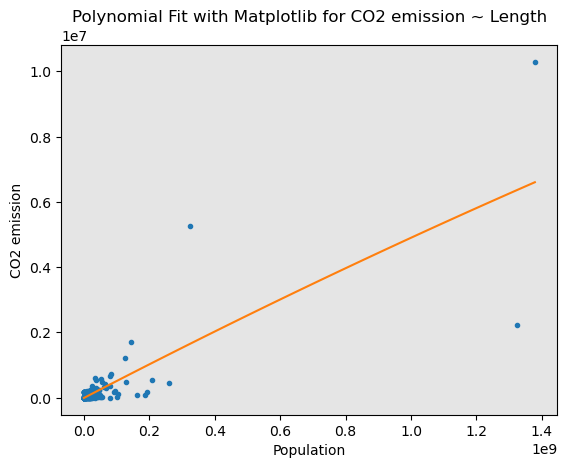

MSE для моделі: 232596015620.61905
R^2 для моделі: 0.643890609154327
          3             2
1.99e-20 x - 3.116e-11 x + 0.01058 x - 6.246e+04


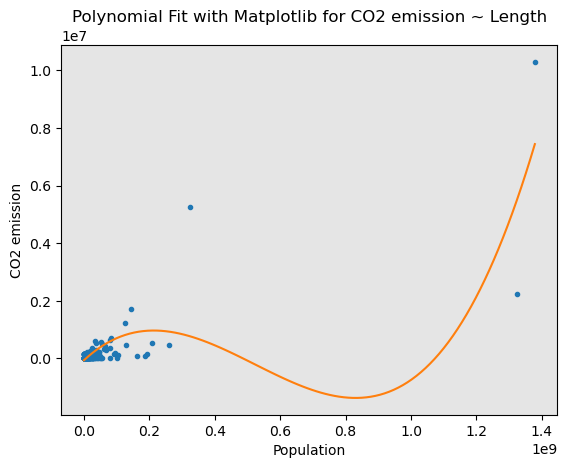

MSE для моделі: 216682265055.0036
R^2 для моделі: 0.6682548958978912
            2
-1.484e-08 x + 0.436 x - 4.963e+04


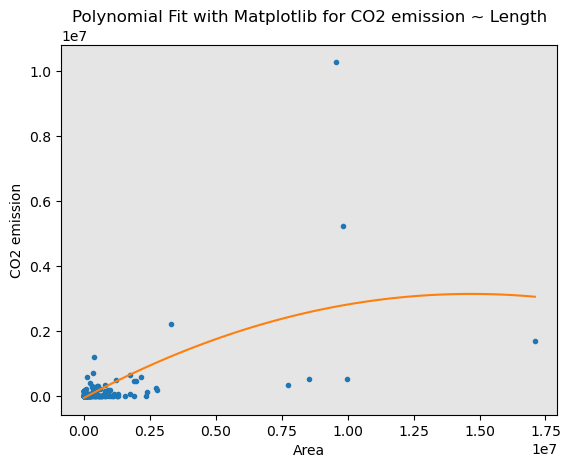

MSE для моделі: 411586514354.21747
R^2 для моделі: 0.3698523918567883
            3             2
-5.057e-15 x + 9.692e-08 x - 0.07469 x + 6.343e+04


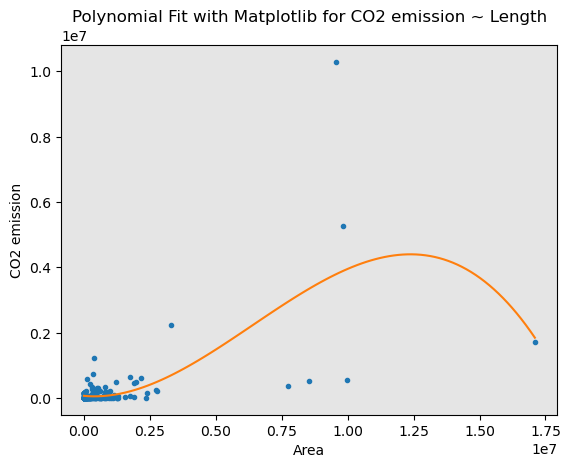

MSE для моделі: 354890940405.7387
R^2 для моделі: 0.456654507742426


In [26]:
x = df[['Population']]
X = df['Population']
Y = df['CO2 emission']
fp = np.polyfit(X, Y, 2)
p = np.poly1d(fp)
# Побудуйте кілька поліноміальних моделей різних порядків.
print(p)
# Побудуйте візуалізації 
PlotPolly(p, X, Y, 'Population')
# Порахуйте значення R^2 та MSE
r2 = r2_score(y, p(X))
mse = mean_squared_error(Y, p(X))
print("MSE для моделі:", mse)
print("R^2 для моделі:", r2)

x = df[['Population']]
X = df['Population']
Y = df['CO2 emission']
fp = np.polyfit(X, Y, 3)
p = np.poly1d(fp)
print(p)
PlotPolly(p, X, Y, 'Population')
r2 = r2_score(y, p(X))
mse = mean_squared_error(Y, p(X))
print("MSE для моделі:", mse)
print("R^2 для моделі:", r2)

x = df[['Area']]
X = df['Area']
Y = df['CO2 emission']
fp = np.polyfit(X, Y, 2)
p = np.poly1d(fp)
print(p)
PlotPolly(p, X, Y, 'Area')
r2 = r2_score(y, p(X))
mse = mean_squared_error(Y, p(X))
print("MSE для моделі:", mse)
print("R^2 для моделі:", r2)

x = df[['Area']]
X = df['Area']
Y = df['CO2 emission']
fp = np.polyfit(X, Y, 3)
p = np.poly1d(fp)
print(p)
PlotPolly(p, X, Y, 'Area')
r2 = r2_score(y, p(X))
mse = mean_squared_error(Y, p(X))
print("MSE для моделі:", mse)
print("R^2 для моделі:", r2)

<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель 1 є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>


<h2>Виконала студентка групи ІП-21<br>  Гордич Оксана</h2>